In [2]:
# Import necessary libraries
import math
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import itertools
from sklearn.datasets import load_iris

In [38]:
id_1 = 7502
id_2 = 7617
id_3 = 7391
random_seed = id_1+id_2+id_3
random.seed(random_seed)

all_data = pd.read_csv(r'C:\Users\Rawan\Desktop\term 7\machine learning\Assignment 3_attachments\Assignment 3_attachments\Data.csv')
output_path=r'C:\Users\Rawan\Desktop\term 7\machine learning\Assignment 3_attachments\Assignment 3_attachments\Output_Data.csv'

all_columns = all_data.columns.tolist()

target_column = 'smoking'

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
df = all_data[selected_columns].copy()
df.to_csv(output_path)


['id', 'AST', 'Cholesterol', 'LDL', 'eyesight(right)', 'HDL', 'triglyceride', 'eyesight(left)', 'height(cm)', 'Urine protein']


In [39]:
y=df['smoking']

In [40]:
x=df.drop(columns=['smoking'])

In [6]:
x

id  AST  Cholesterol  LDL  eyesight(right)  HDL  triglyceride  \
0            0   22          172   75              0.6   40           300   
1            1   27          194  126              0.7   57            55   
2            2   27          178   93              0.5   45           197   
3            3   20          180  102              1.2   38           203   
4            4   19          155   93              1.0   44            87   
...        ...  ...          ...  ...              ...  ...           ...   
159251  159251   25          238  159              2.0   72            47   
159252  159252   21          213  108              1.0   64           202   
159253  159253   15          189   93              1.0   87            45   
159254  159254   22          165   80              1.0   55           148   
159255  159255   21          186   81              1.2   87            87   

        eyesight(left)  height(cm)  Urine protein  
0                  0.5         165              1  
1                  0.6         165              1  
2                  0.4         170              1  
3                  1.5         180              1  
4                  1.5         165              1  
...                ...         ...            ...  
159251             1.5         155              1  
159252             1.0         155              1  
159253             1.5         160              1  
159254             1.2         165              1  
159255             1.0         145              1  

[159256 rows x 10 columns]

## spliiting the data into train , test and valdation

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)


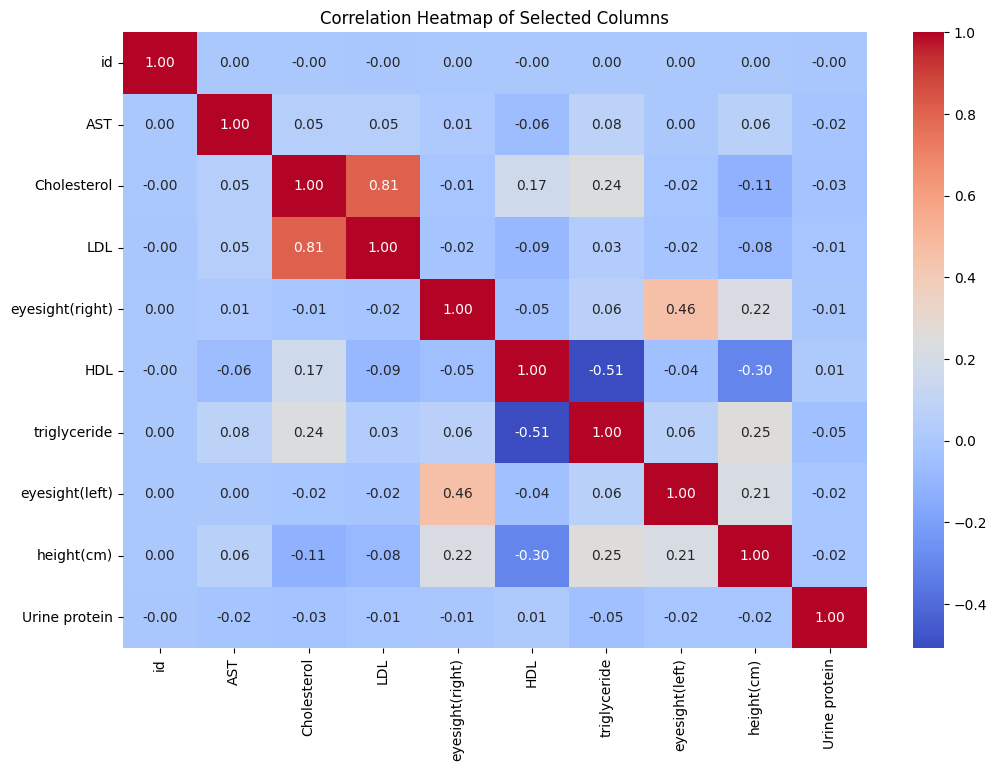

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [10]:
x_train.head()

id  AST  Cholesterol  LDL  eyesight(right)  HDL  triglyceride  \
17406  17406   24          172   93              0.8   41           190   
61303  61303   34          205  116              1.2   77            59   
71781  71781   17          186   95              0.7   62           145   
67014  67014   38          167   95              1.0   61            59   
73322  73322   25          171  104              1.0   46           110   

       eyesight(left)  height(cm)  Urine protein  
17406             1.0         165              1  
61303             1.0         160              1  
71781             0.9         160              1  
67014             0.9         155              1  
73322             0.7         155              1

In [43]:


# Assuming df is your DataFrame
# Calculate mean for each feature
mean_values = x_train.mean()

# Calculate median for each feature
median_values = x_train.median()

# Calculate variance for each feature
variance_values = x_train.var()

# Calculate standard deviation for each feature
std_dev_values = x_train.std()

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

print(summary_stats)


                         Mean   Median      Variance  Standard Deviation
id               79485.227218  79510.0  2.116261e+09        46002.841393
AST                 25.529427     24.0  9.038470e+01            9.507087
Cholesterol        195.776505    196.0  8.080963e+02           28.427035
LDL                114.588425    114.0  7.899438e+02           28.105938
eyesight(right)      1.000727      1.0  1.518595e-01            0.389692
HDL                 55.855524     54.0  1.947035e+02           13.953620
triglyceride       127.597601    114.0  4.392356e+03           66.274852
eyesight(left)       1.006146      1.0  1.601109e-01            0.400139
height(cm)         165.261708    165.0  7.791333e+01            8.826853
Urine protein        1.074310      1.0  1.201351e-01            0.346605


In [44]:
train = x_train.copy()
train['smoking'] = y_train.copy()

## univariate analysis

## 1)Probability Density Function (PDF)

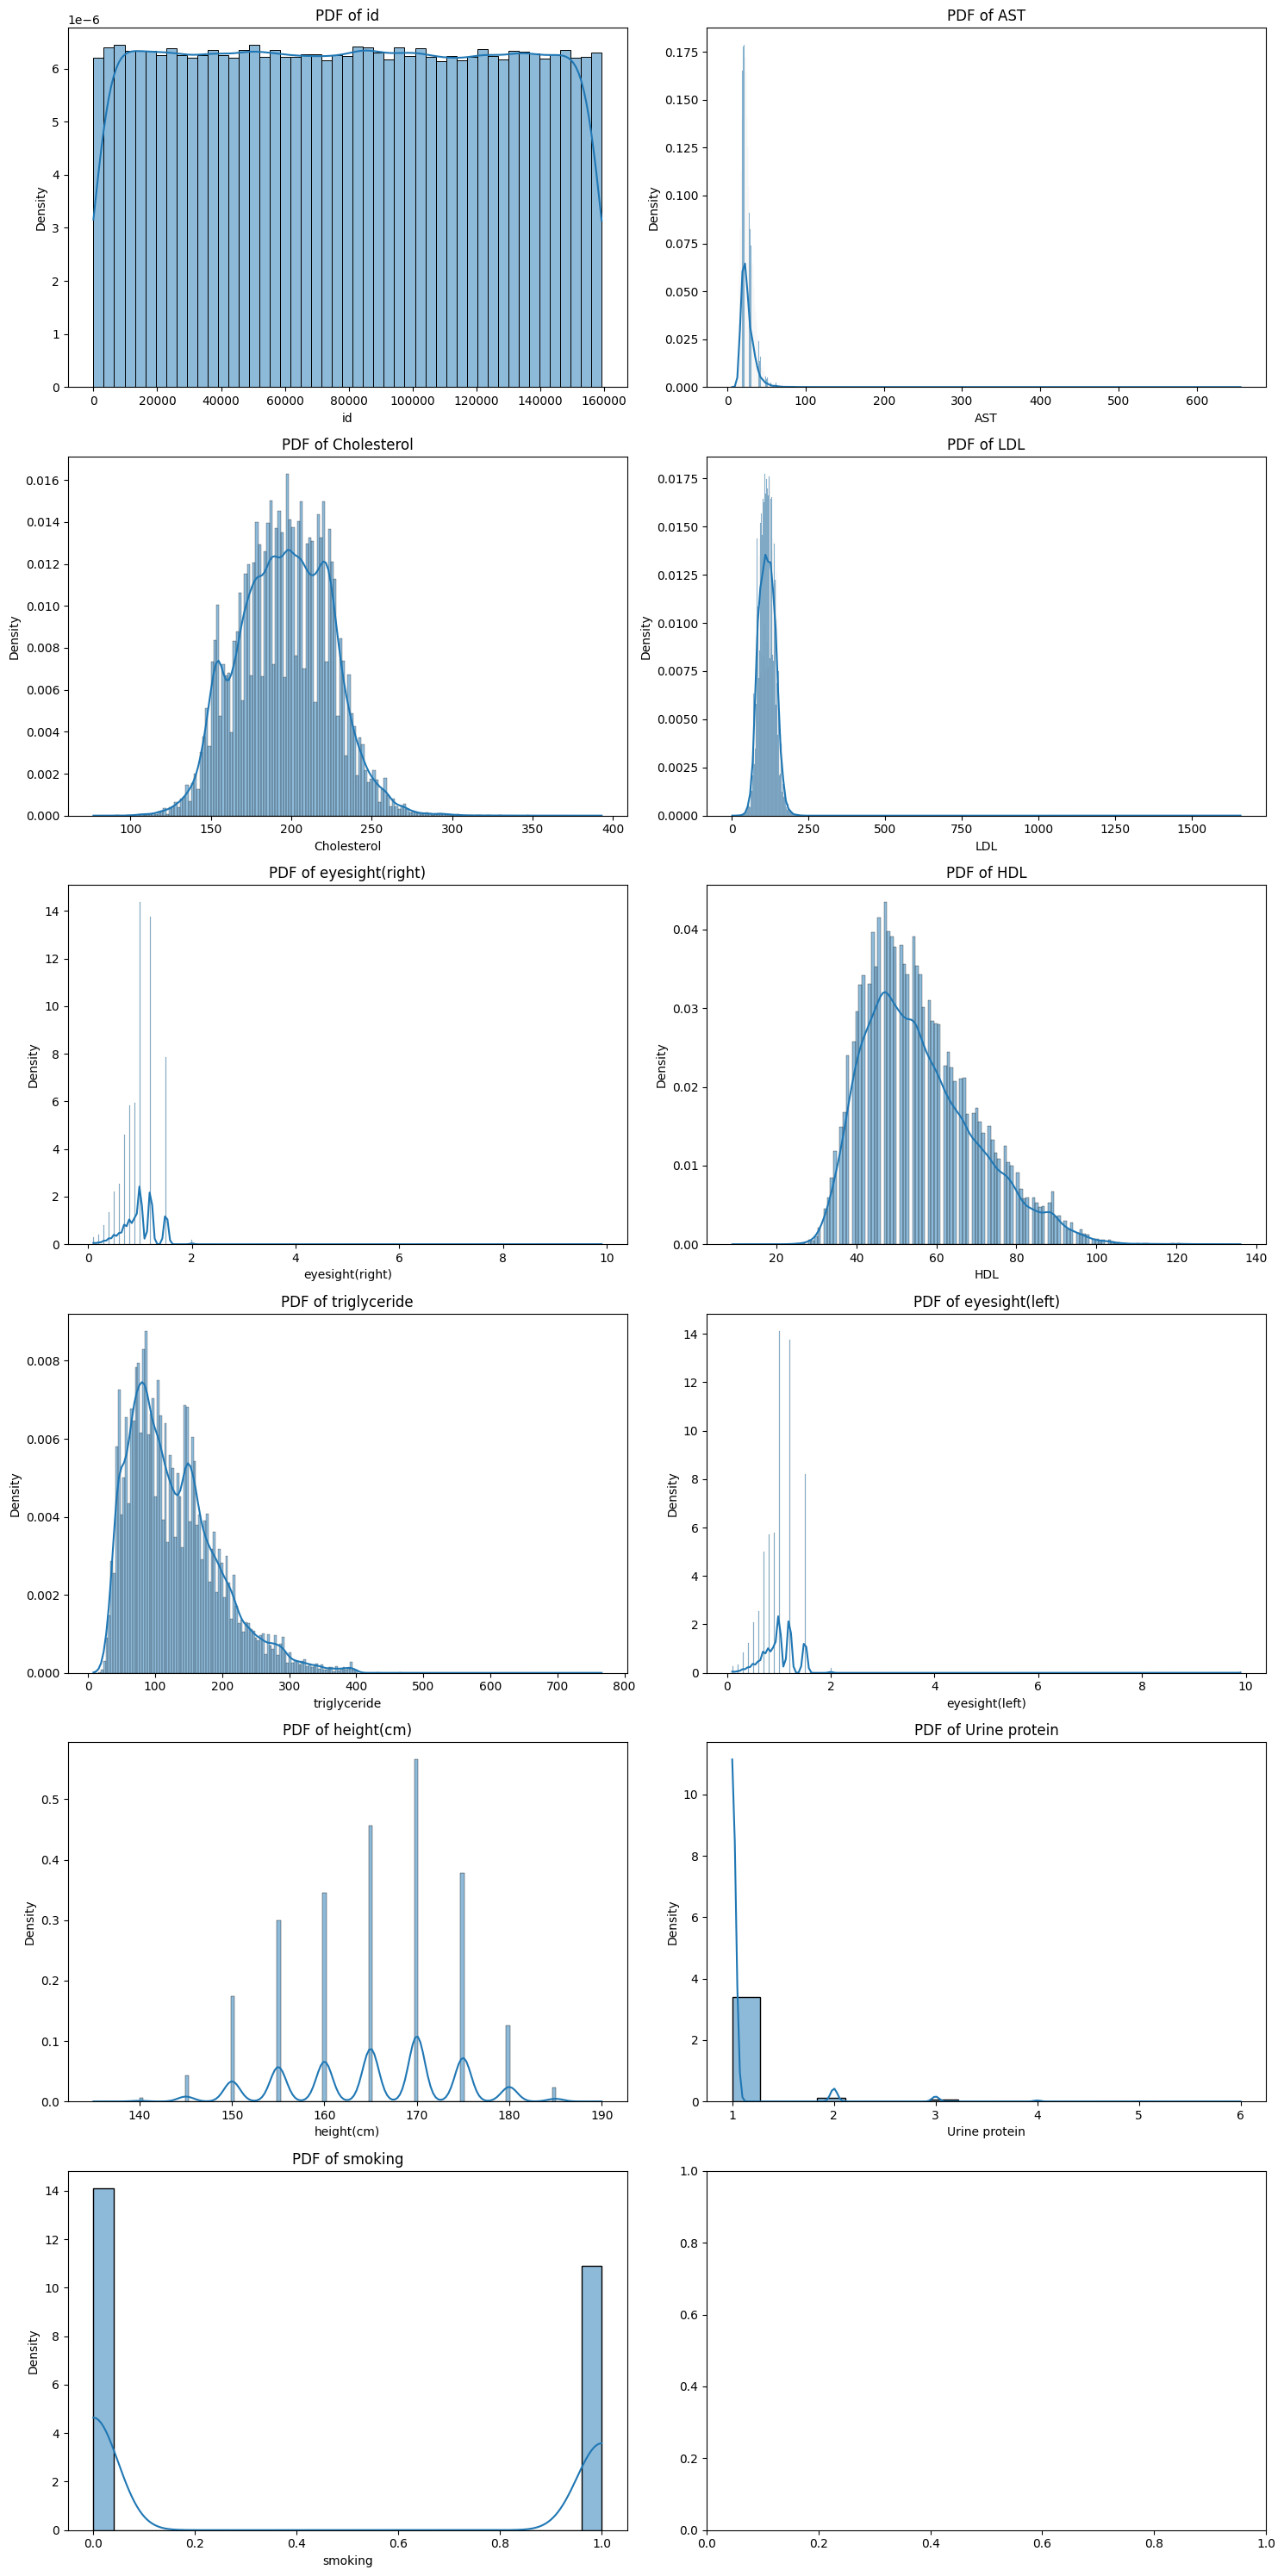

In [49]:
# Create subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 5 * 6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(train.columns):
    ax = axes[i]
    sns.histplot(train[column], kde=True, stat='density', ax=ax)
    ax.set_title(f'PDF of {column}')

# Adjust layout
plt.tight_layout()
plt.show()



## 2)histogram

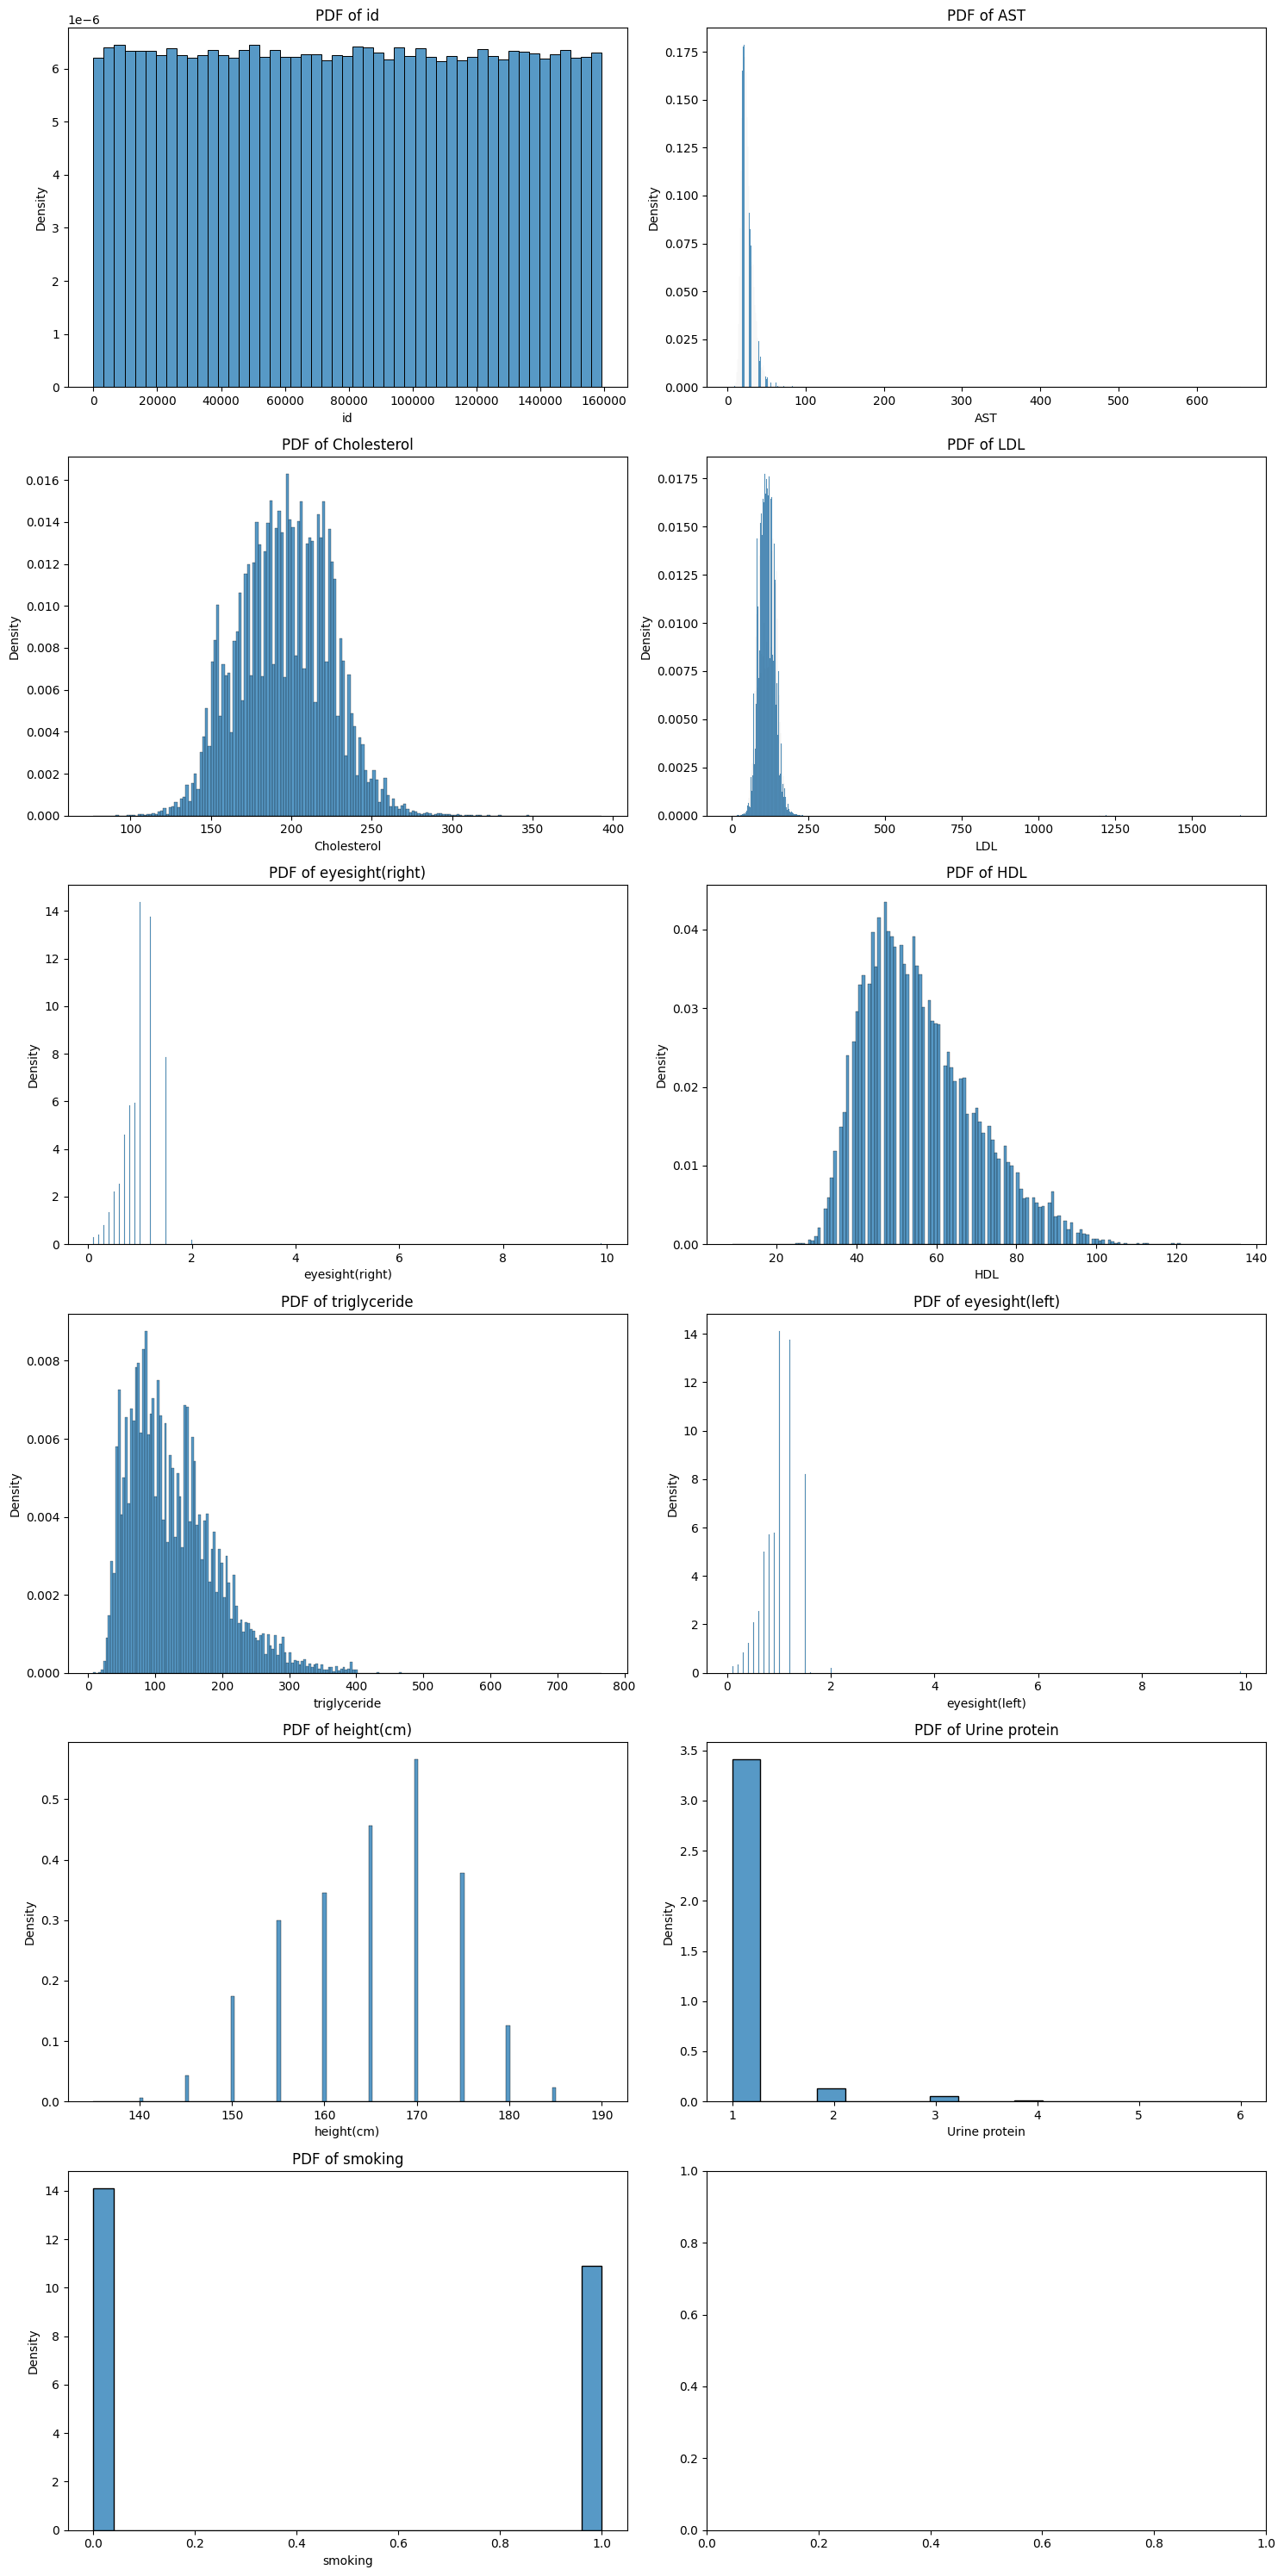

In [50]:
# Create subplots
fig, axes = plt.subplots(6, 2, figsize=(15, 5 * 6))

# Plot histograms
for i, column in enumerate(train.columns):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index

    ax = axes[row, col]
    sns.histplot(train[column], stat='density', ax=ax)
    ax.set_title(f'PDF of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


## 3)Density plot

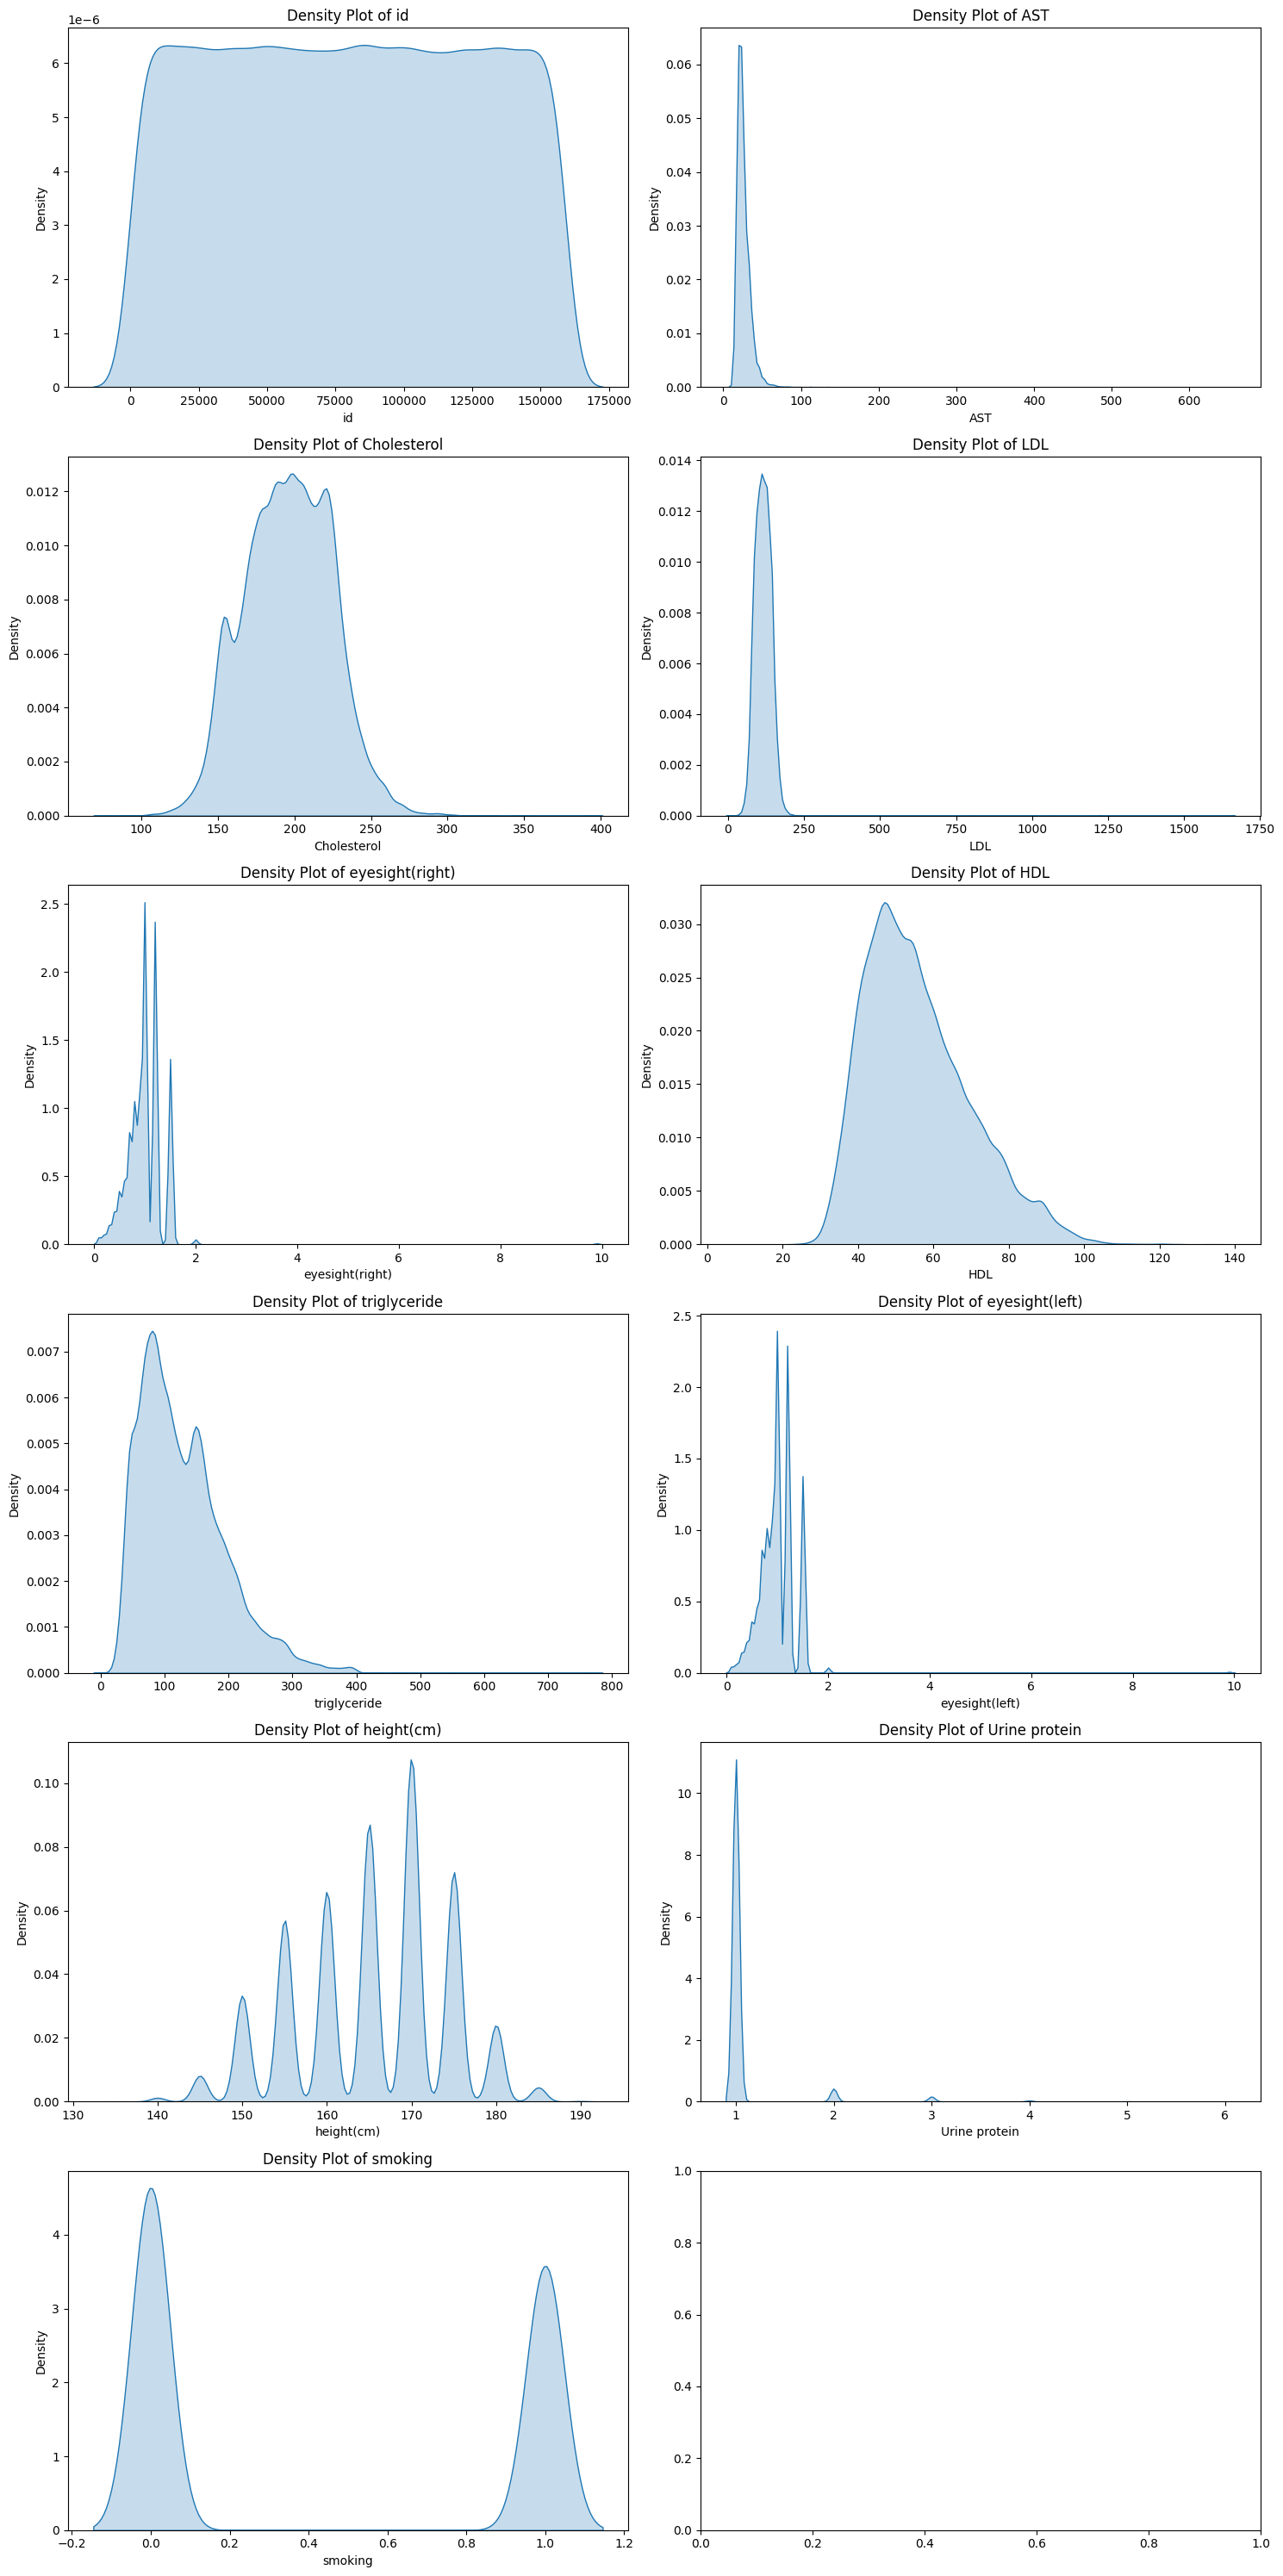

In [53]:
# Assuming df is your DataFrame
num_cols = 2  # Adjusted to have 2 plots per row
num_rows = 6

fig, axes = plt.subplots(6, 2, figsize=(15, 5 * num_rows))

for i, column in enumerate(train.columns):
    row_num = i // num_cols
    col_num = i % num_cols

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]  # Adjusting for single-row subplots

    sns.kdeplot(data=train[column], fill=True, ax=ax)
    ax.set_title(f'Density Plot of {column}')


plt.tight_layout()
plt.show()


## 4)Violin plot

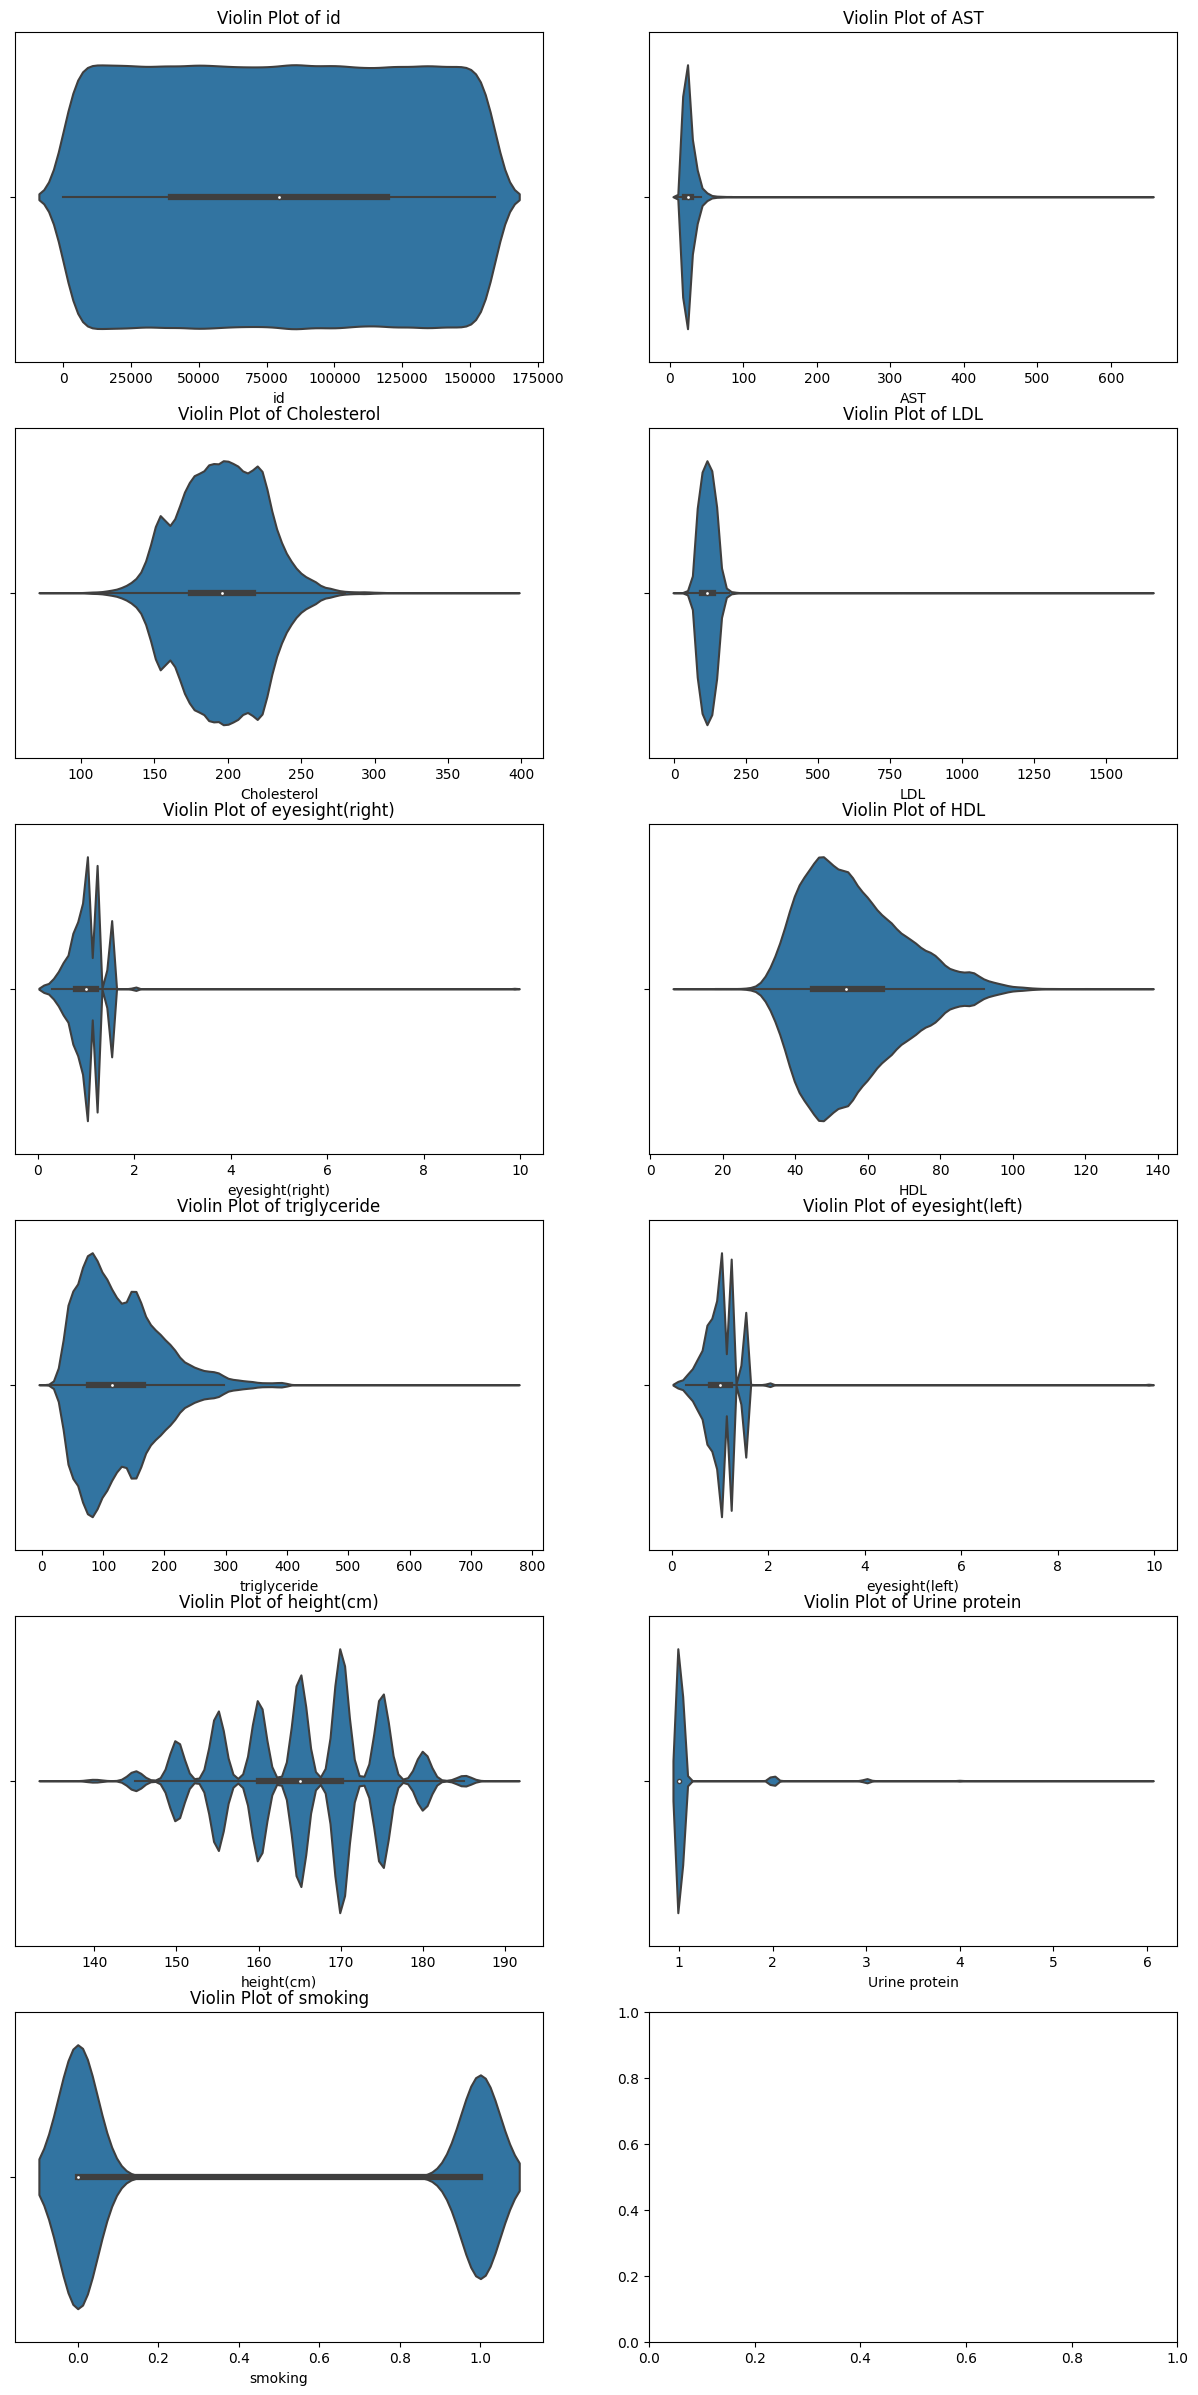

In [54]:
# Assuming df is your DataFrame
num_cols = 2  # Adjusted to have 2 plots per row
num_rows = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(train.columns):
    row_num = i // num_cols
    col_num = i % num_cols

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]  # Adjusting for single-row subplots

    sns.violinplot(x=train[column], ax=ax)
    ax.set_title(f'Violin Plot of {column}')


# plt.tight_layout()
plt.show()


## 5)Box plot

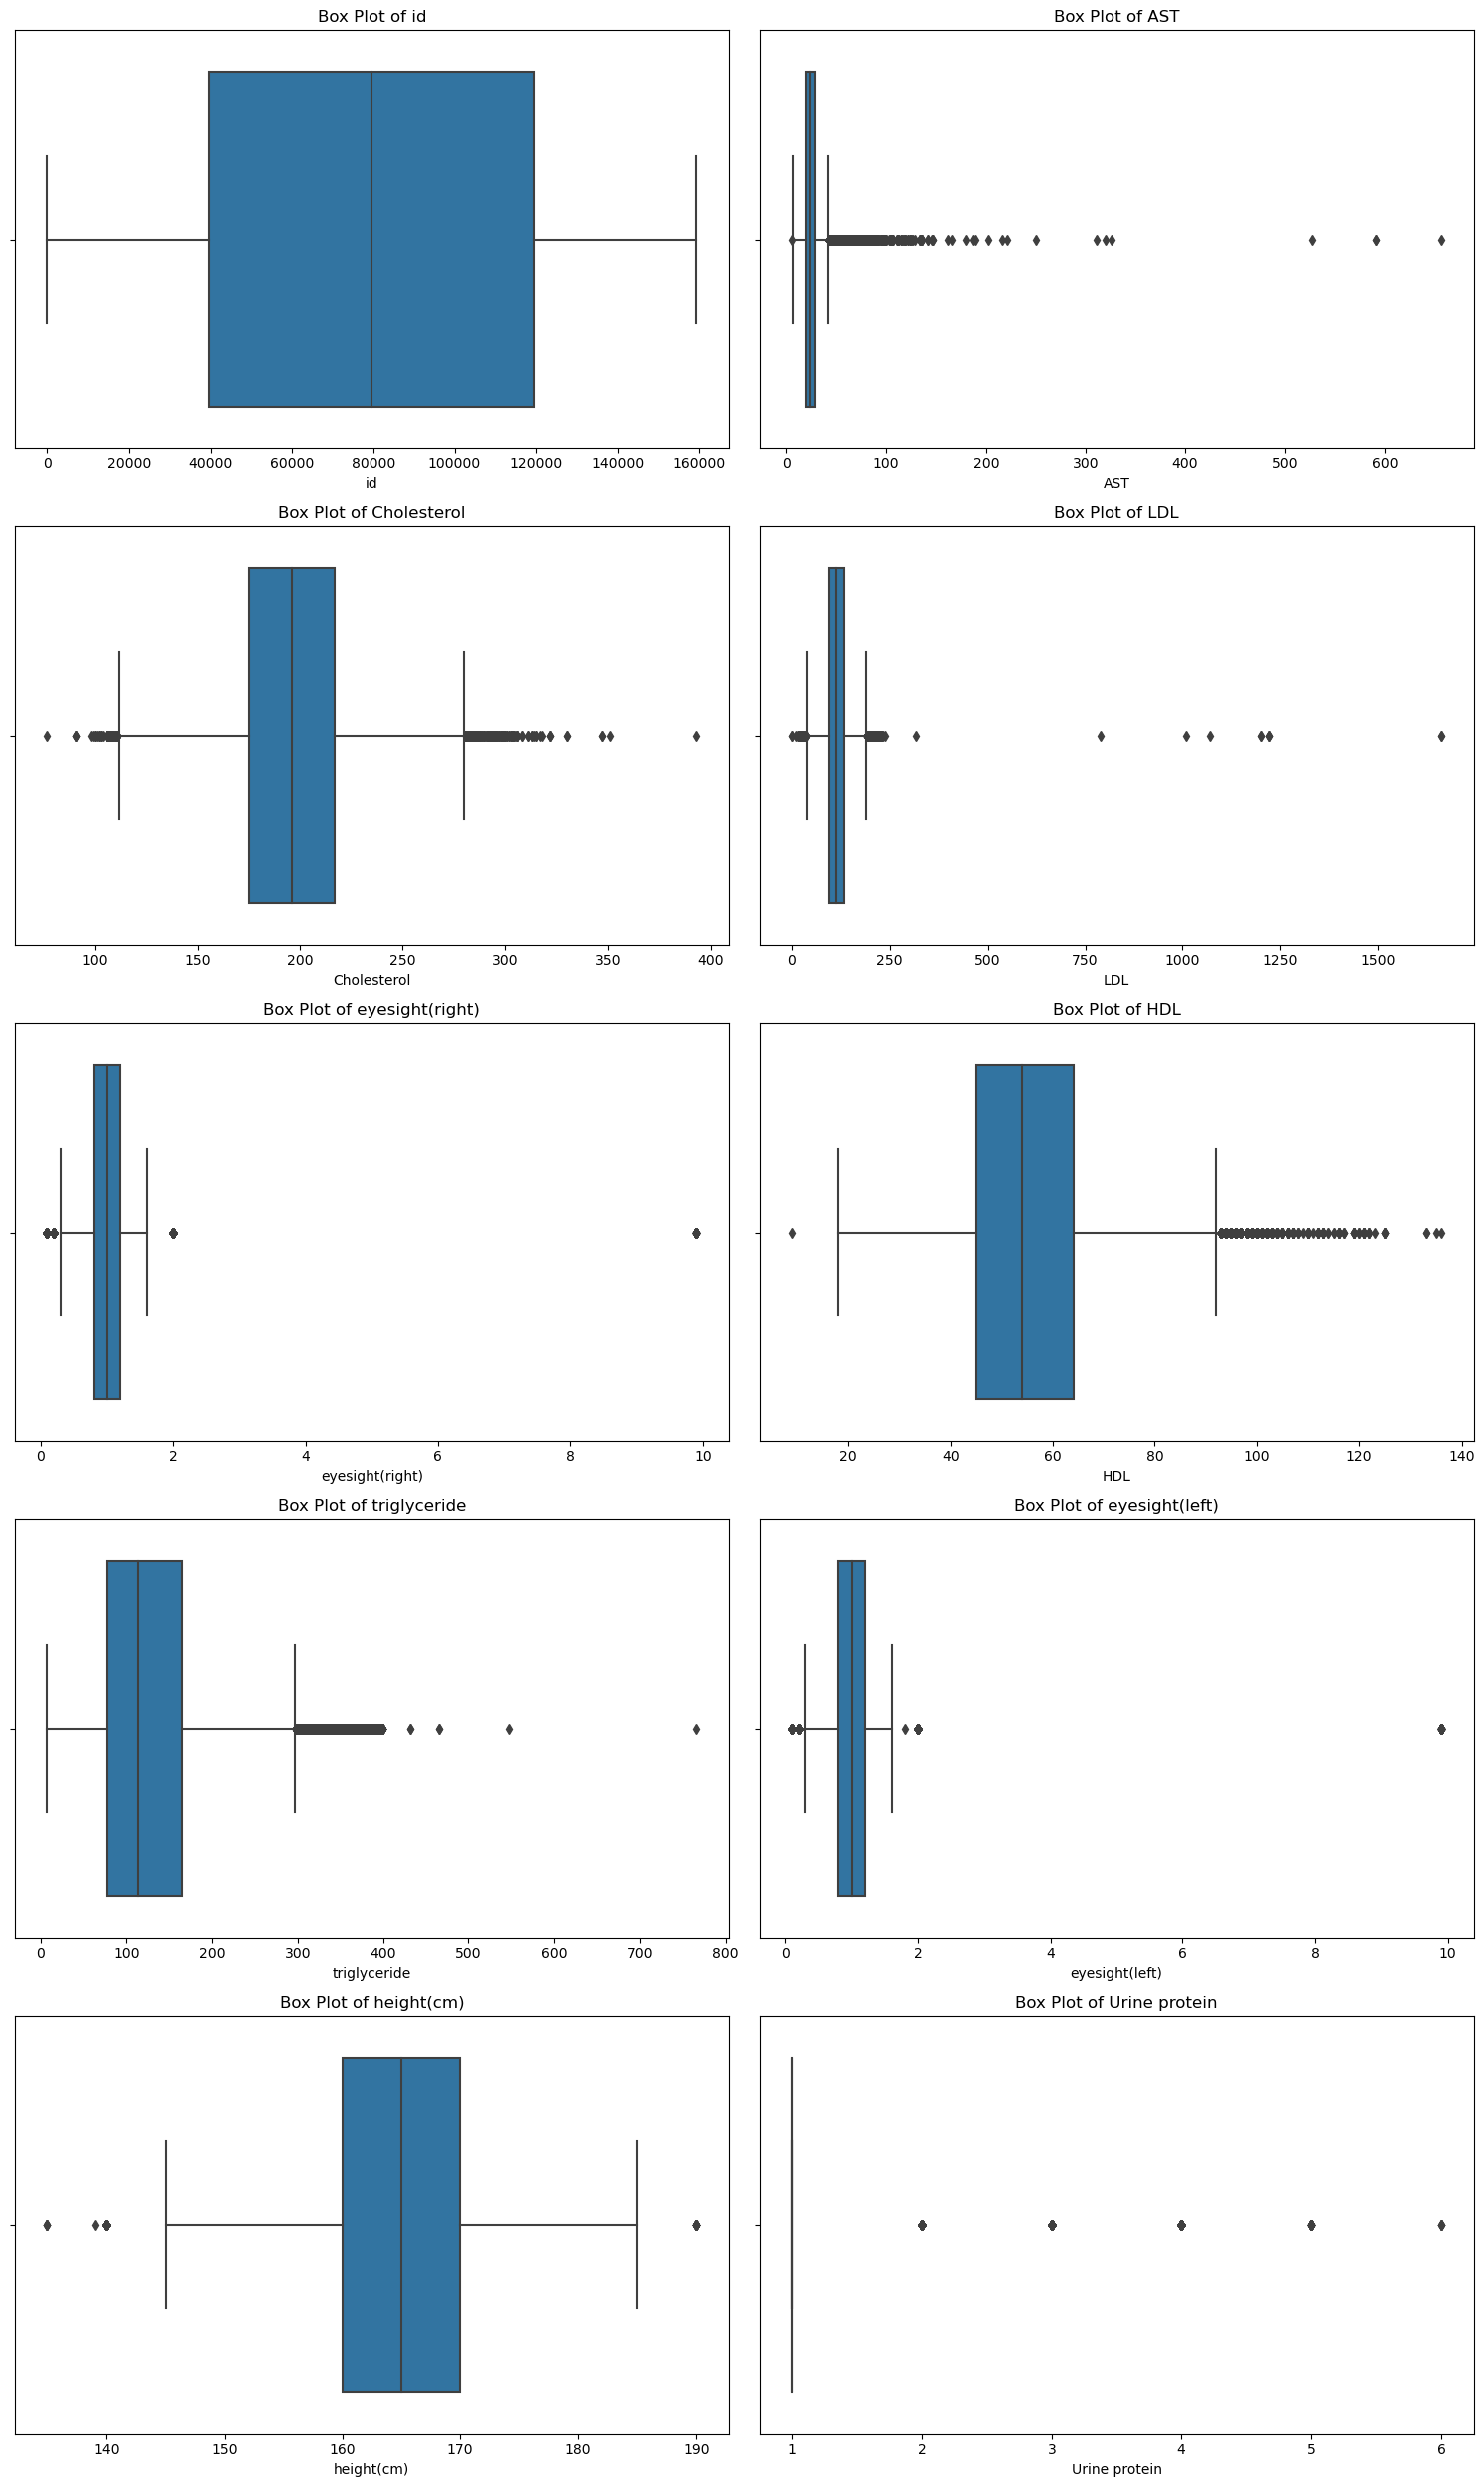

In [ ]:
# Assuming df is your DataFrame
num_cols = 2  # Adjusted to have 2 plots per row
num_rows = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(x_train.columns):
    row_num = i // num_cols
    col_num = i % num_cols

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]  # Adjusting for single-row subplots

    sns.boxplot(x=x_train[column], ax=ax)
    ax.set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


## 6)Scatter Plot


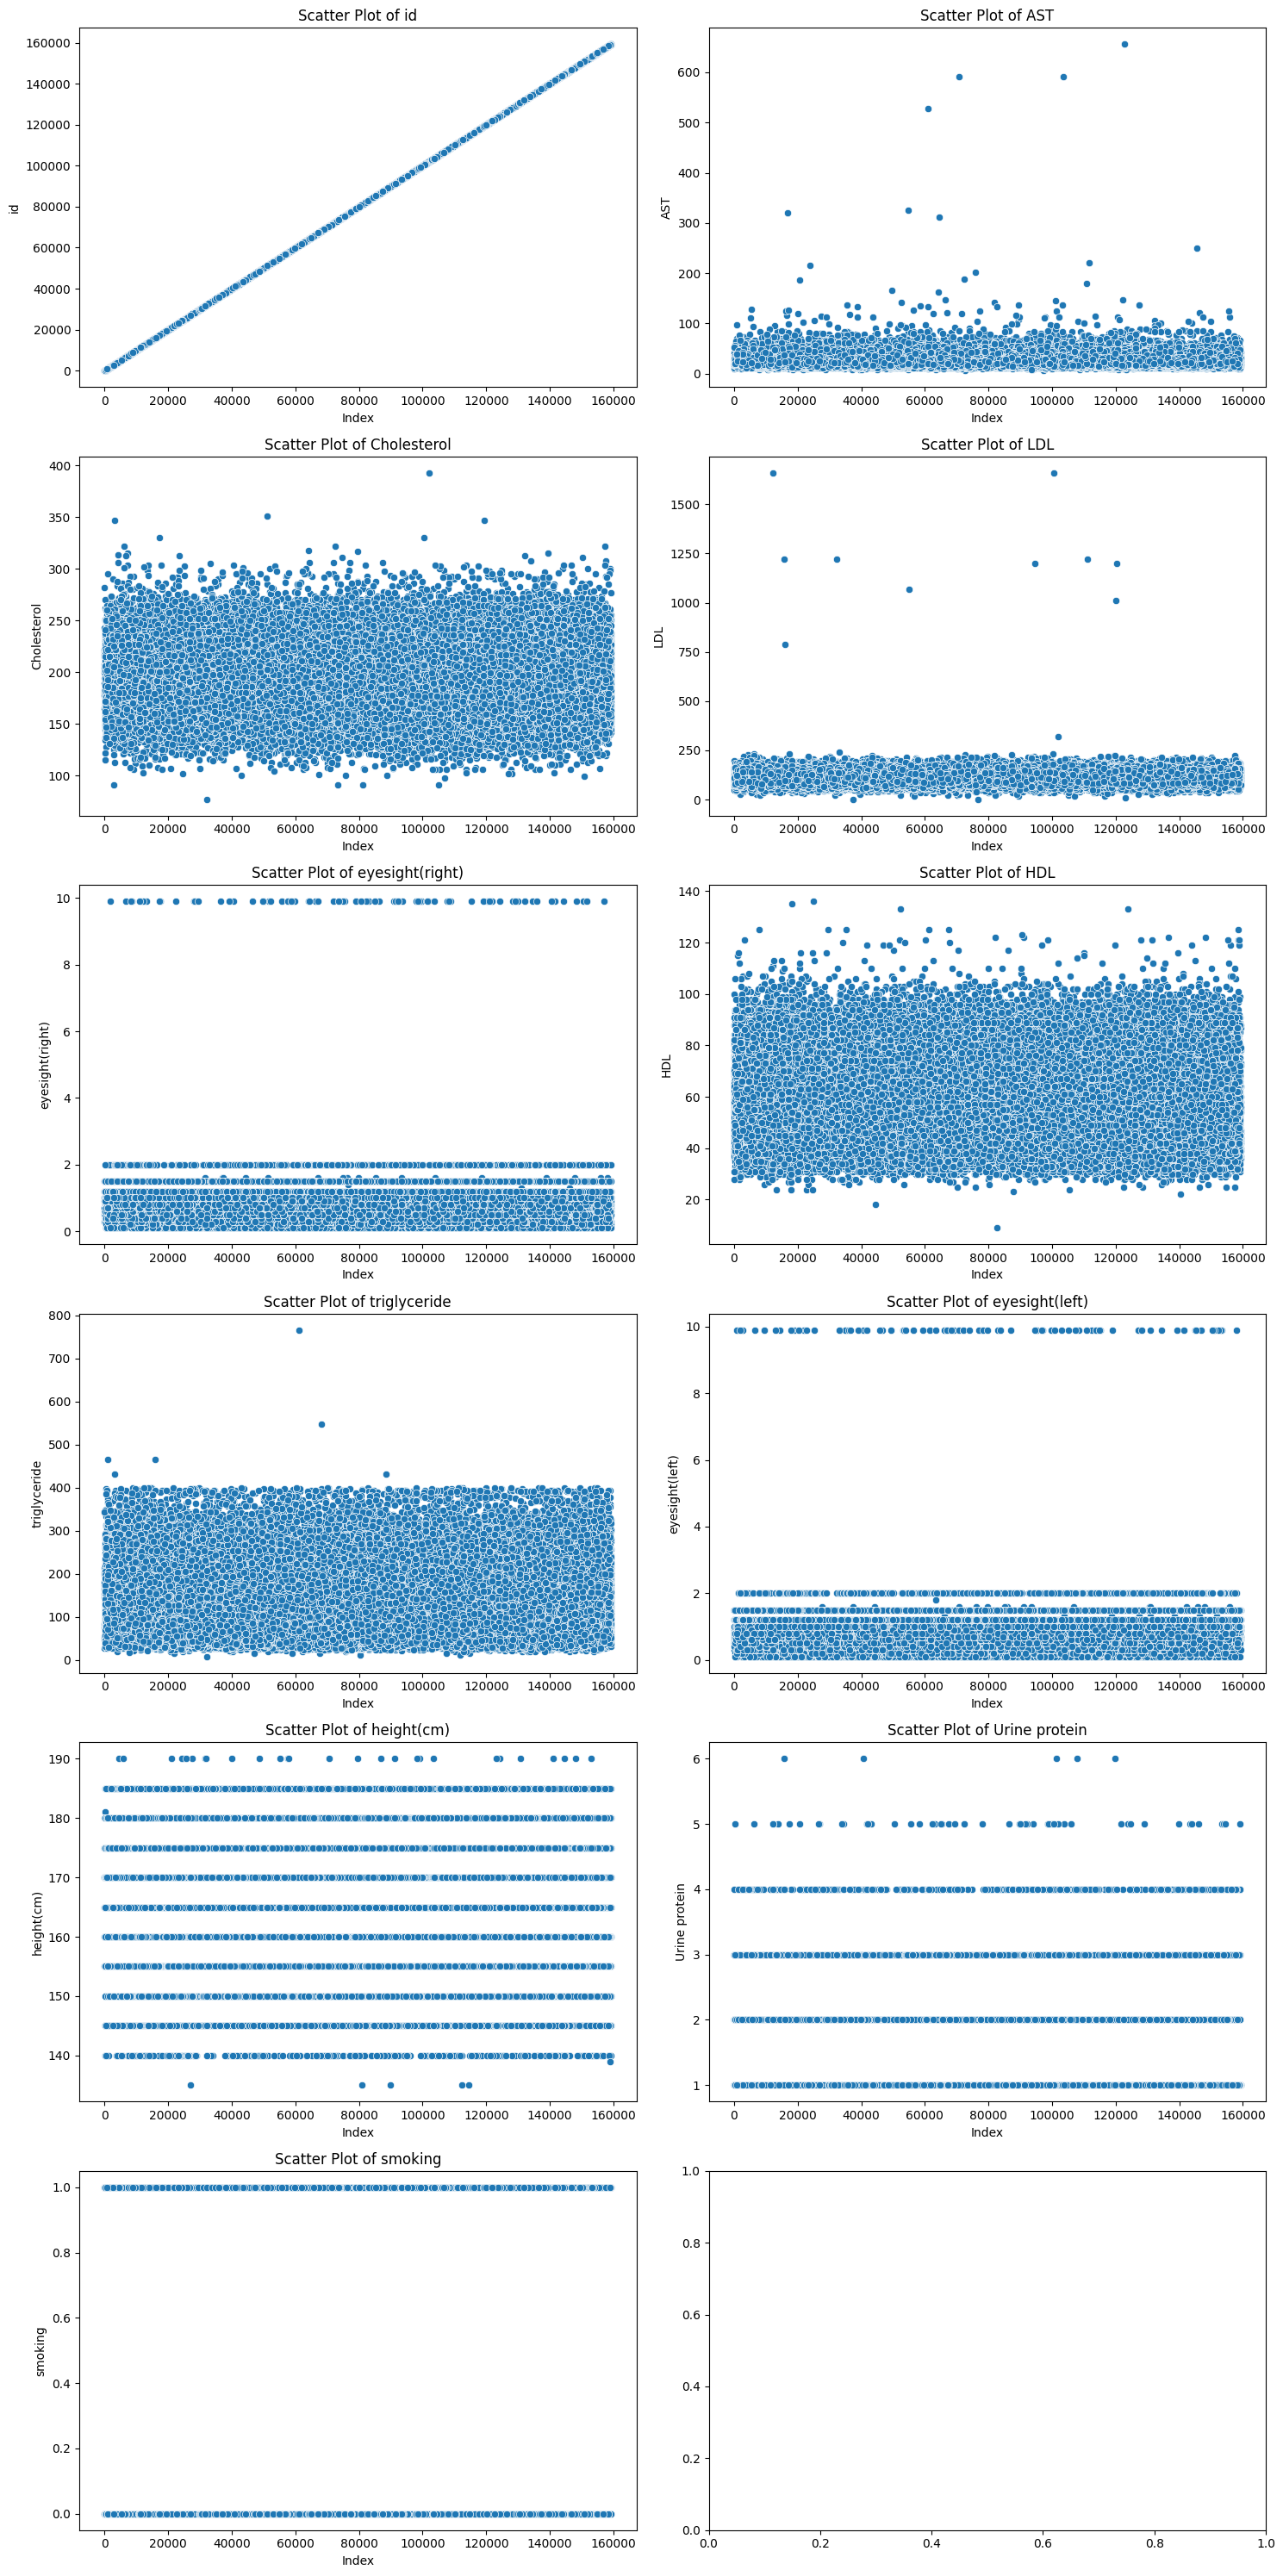

In [55]:
# Assuming df is your DataFrame
num_cols = 2  # Adjusted to have 2 plots per row
num_rows = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(train.columns):
    row_num = i // num_cols
    col_num = i % num_cols

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]  # Adjusting for single-row subplots

    sns.scatterplot(x=x_train.index, y=train[column], ax=ax)
    ax.set_title(f'Scatter Plot of {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel(column)


plt.tight_layout()
plt.show()


## Bivariate analysis

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111479 entries, 17406 to 121958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               111479 non-null  int64  
 1   AST              111479 non-null  int64  
 2   Cholesterol      111479 non-null  int64  
 3   LDL              111479 non-null  int64  
 4   eyesight(right)  111479 non-null  float64
 5   HDL              111479 non-null  int64  
 6   triglyceride     111479 non-null  int64  
 7   eyesight(left)   111479 non-null  float64
 8   height(cm)       111479 non-null  int64  
 9   Urine protein    111479 non-null  int64  
 10  smoking          111479 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 10.2 MB


In [33]:
features=['smoking','Cholesterol', 'HDL', 'LDL', 'triglyceride', 'eyesight(right)', 'eyesight(left)', 'height(cm)', 'Urine protein', 'id', 'AST']
num_cols = 4
num_combinations = len(features) * (len(features) - 1) // 2
num_rows = (num_combinations - 1) // num_cols + 1
combinations = list(itertools.combinations(features, 2))

In [34]:
combinations

[('smoking', 'Cholesterol'),
 ('smoking', 'HDL'),
 ('smoking', 'LDL'),
 ('smoking', 'triglyceride'),
 ('smoking', 'eyesight(right)'),
 ('smoking', 'eyesight(left)'),
 ('smoking', 'height(cm)'),
 ('smoking', 'Urine protein'),
 ('smoking', 'id'),
 ('smoking', 'AST'),
 ('Cholesterol', 'HDL'),
 ('Cholesterol', 'LDL'),
 ('Cholesterol', 'triglyceride'),
 ('Cholesterol', 'eyesight(right)'),
 ('Cholesterol', 'eyesight(left)'),
 ('Cholesterol', 'height(cm)'),
 ('Cholesterol', 'Urine protein'),
 ('Cholesterol', 'id'),
 ('Cholesterol', 'AST'),
 ('HDL', 'LDL'),
 ('HDL', 'triglyceride'),
 ('HDL', 'eyesight(right)'),
 ('HDL', 'eyesight(left)'),
 ('HDL', 'height(cm)'),
 ('HDL', 'Urine protein'),
 ('HDL', 'id'),
 ('HDL', 'AST'),
 ('LDL', 'triglyceride'),
 ('LDL', 'eyesight(right)'),
 ('LDL', 'eyesight(left)'),
 ('LDL', 'height(cm)'),
 ('LDL', 'Urine protein'),
 ('LDL', 'id'),
 ('LDL', 'AST'),
 ('triglyceride', 'eyesight(right)'),
 ('triglyceride', 'eyesight(left)'),
 ('triglyceride', 'height(cm)'),
 (

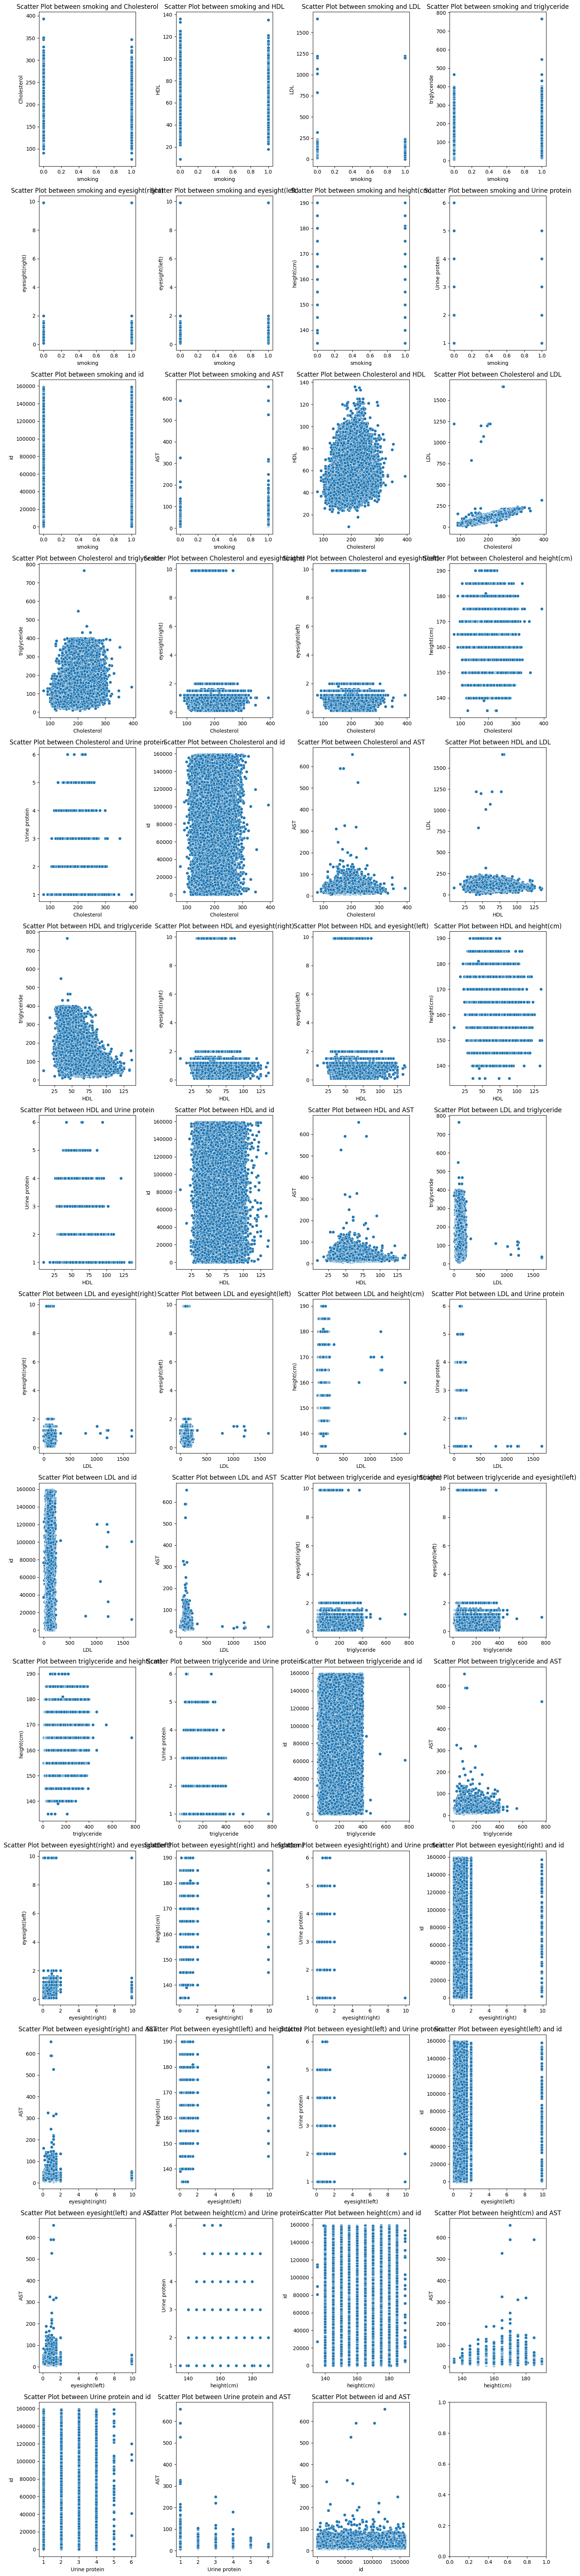

In [ ]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, (x_col, y_col) in enumerate(combinations):
    row_num = i // num_cols
    col_num = i % num_cols

    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=train[x_col], y=train[y_col])
    plt.title(f'Scatter Plot between {x_col} and {y_col}')

plt.tight_layout()
plt.show()


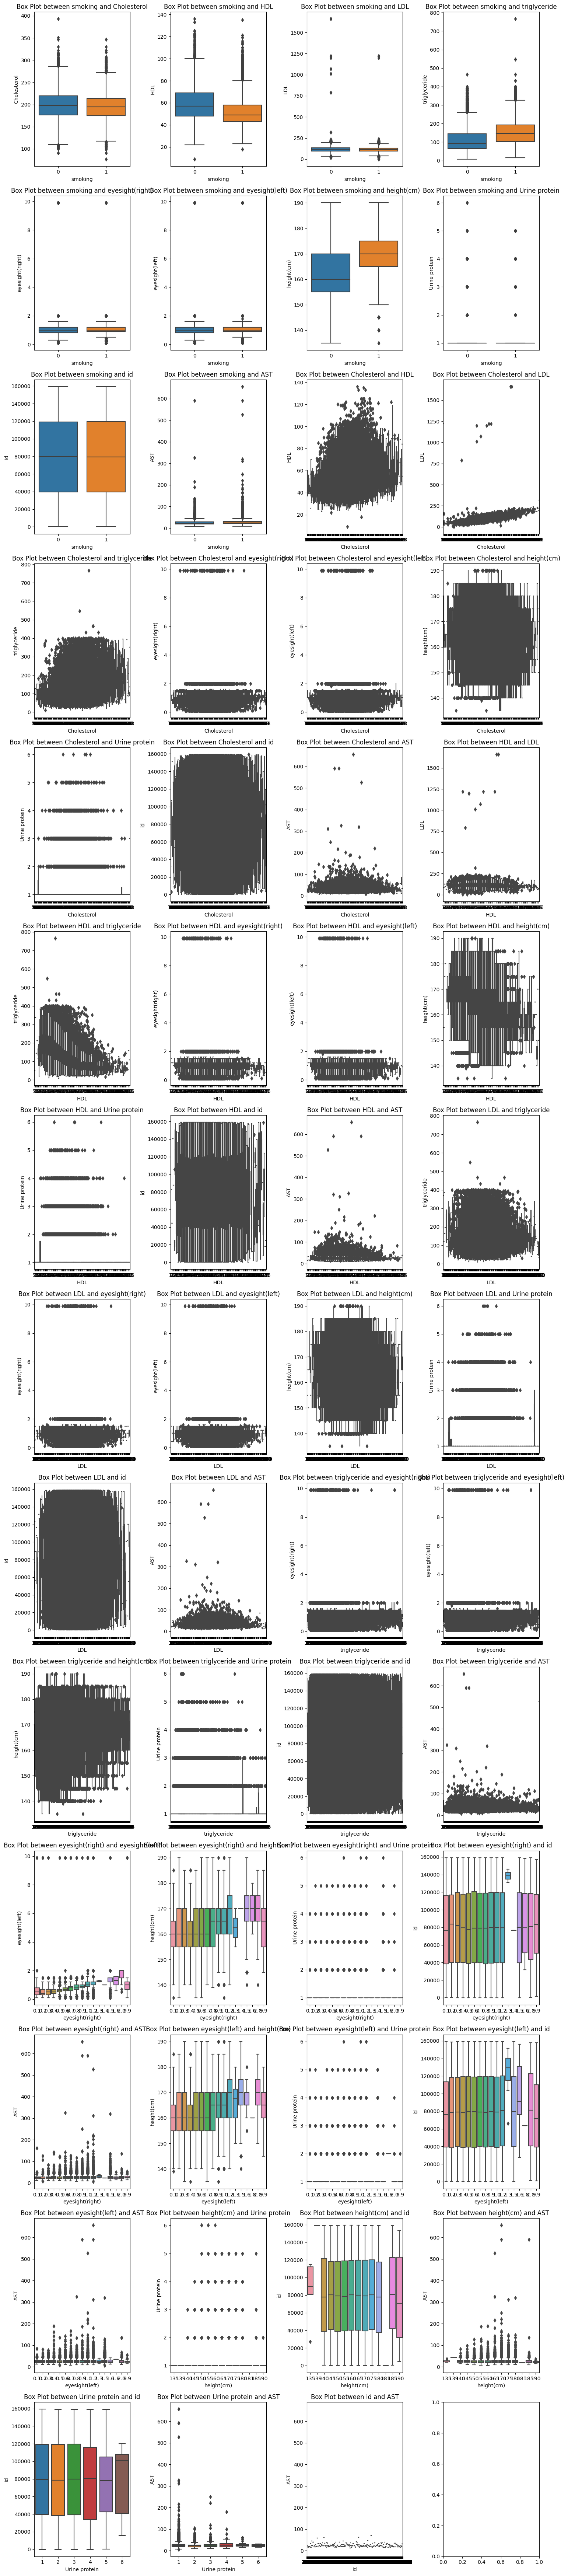

In [ ]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, (x_col, y_col) in enumerate(combinations):
    row_num = i // num_cols
    col_num = i % num_cols

    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=x_col, y=y_col, data=train)
    plt.title(f'Box Plot between {x_col} and {y_col}')

plt.tight_layout()
plt.show()

## Multivariate analysis

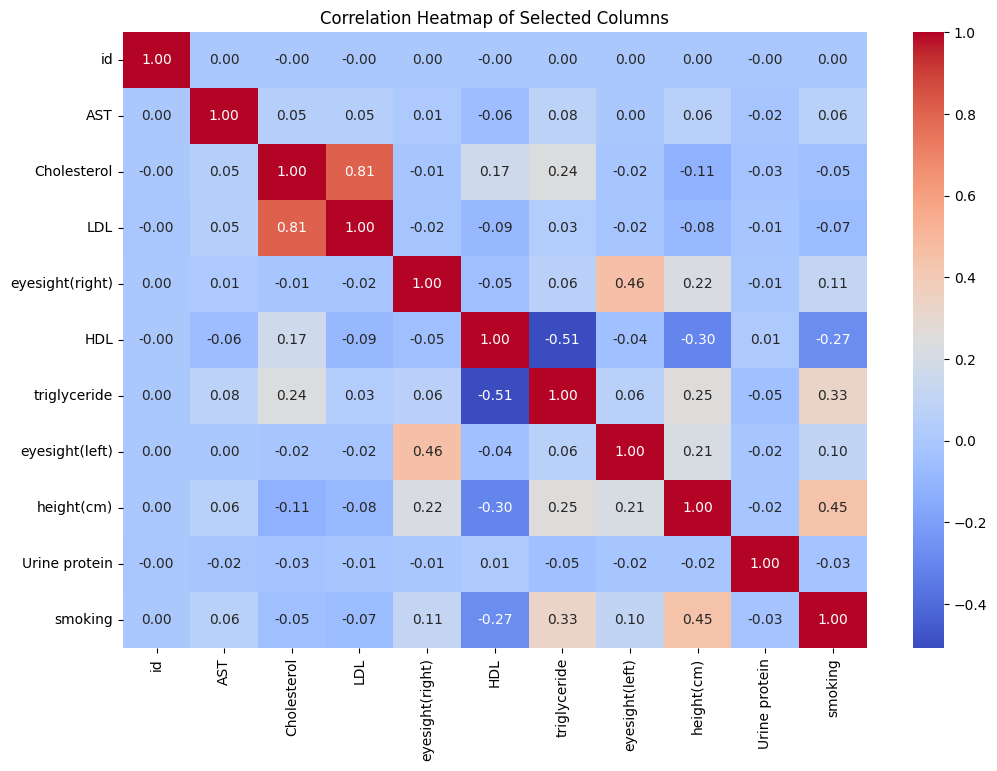

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

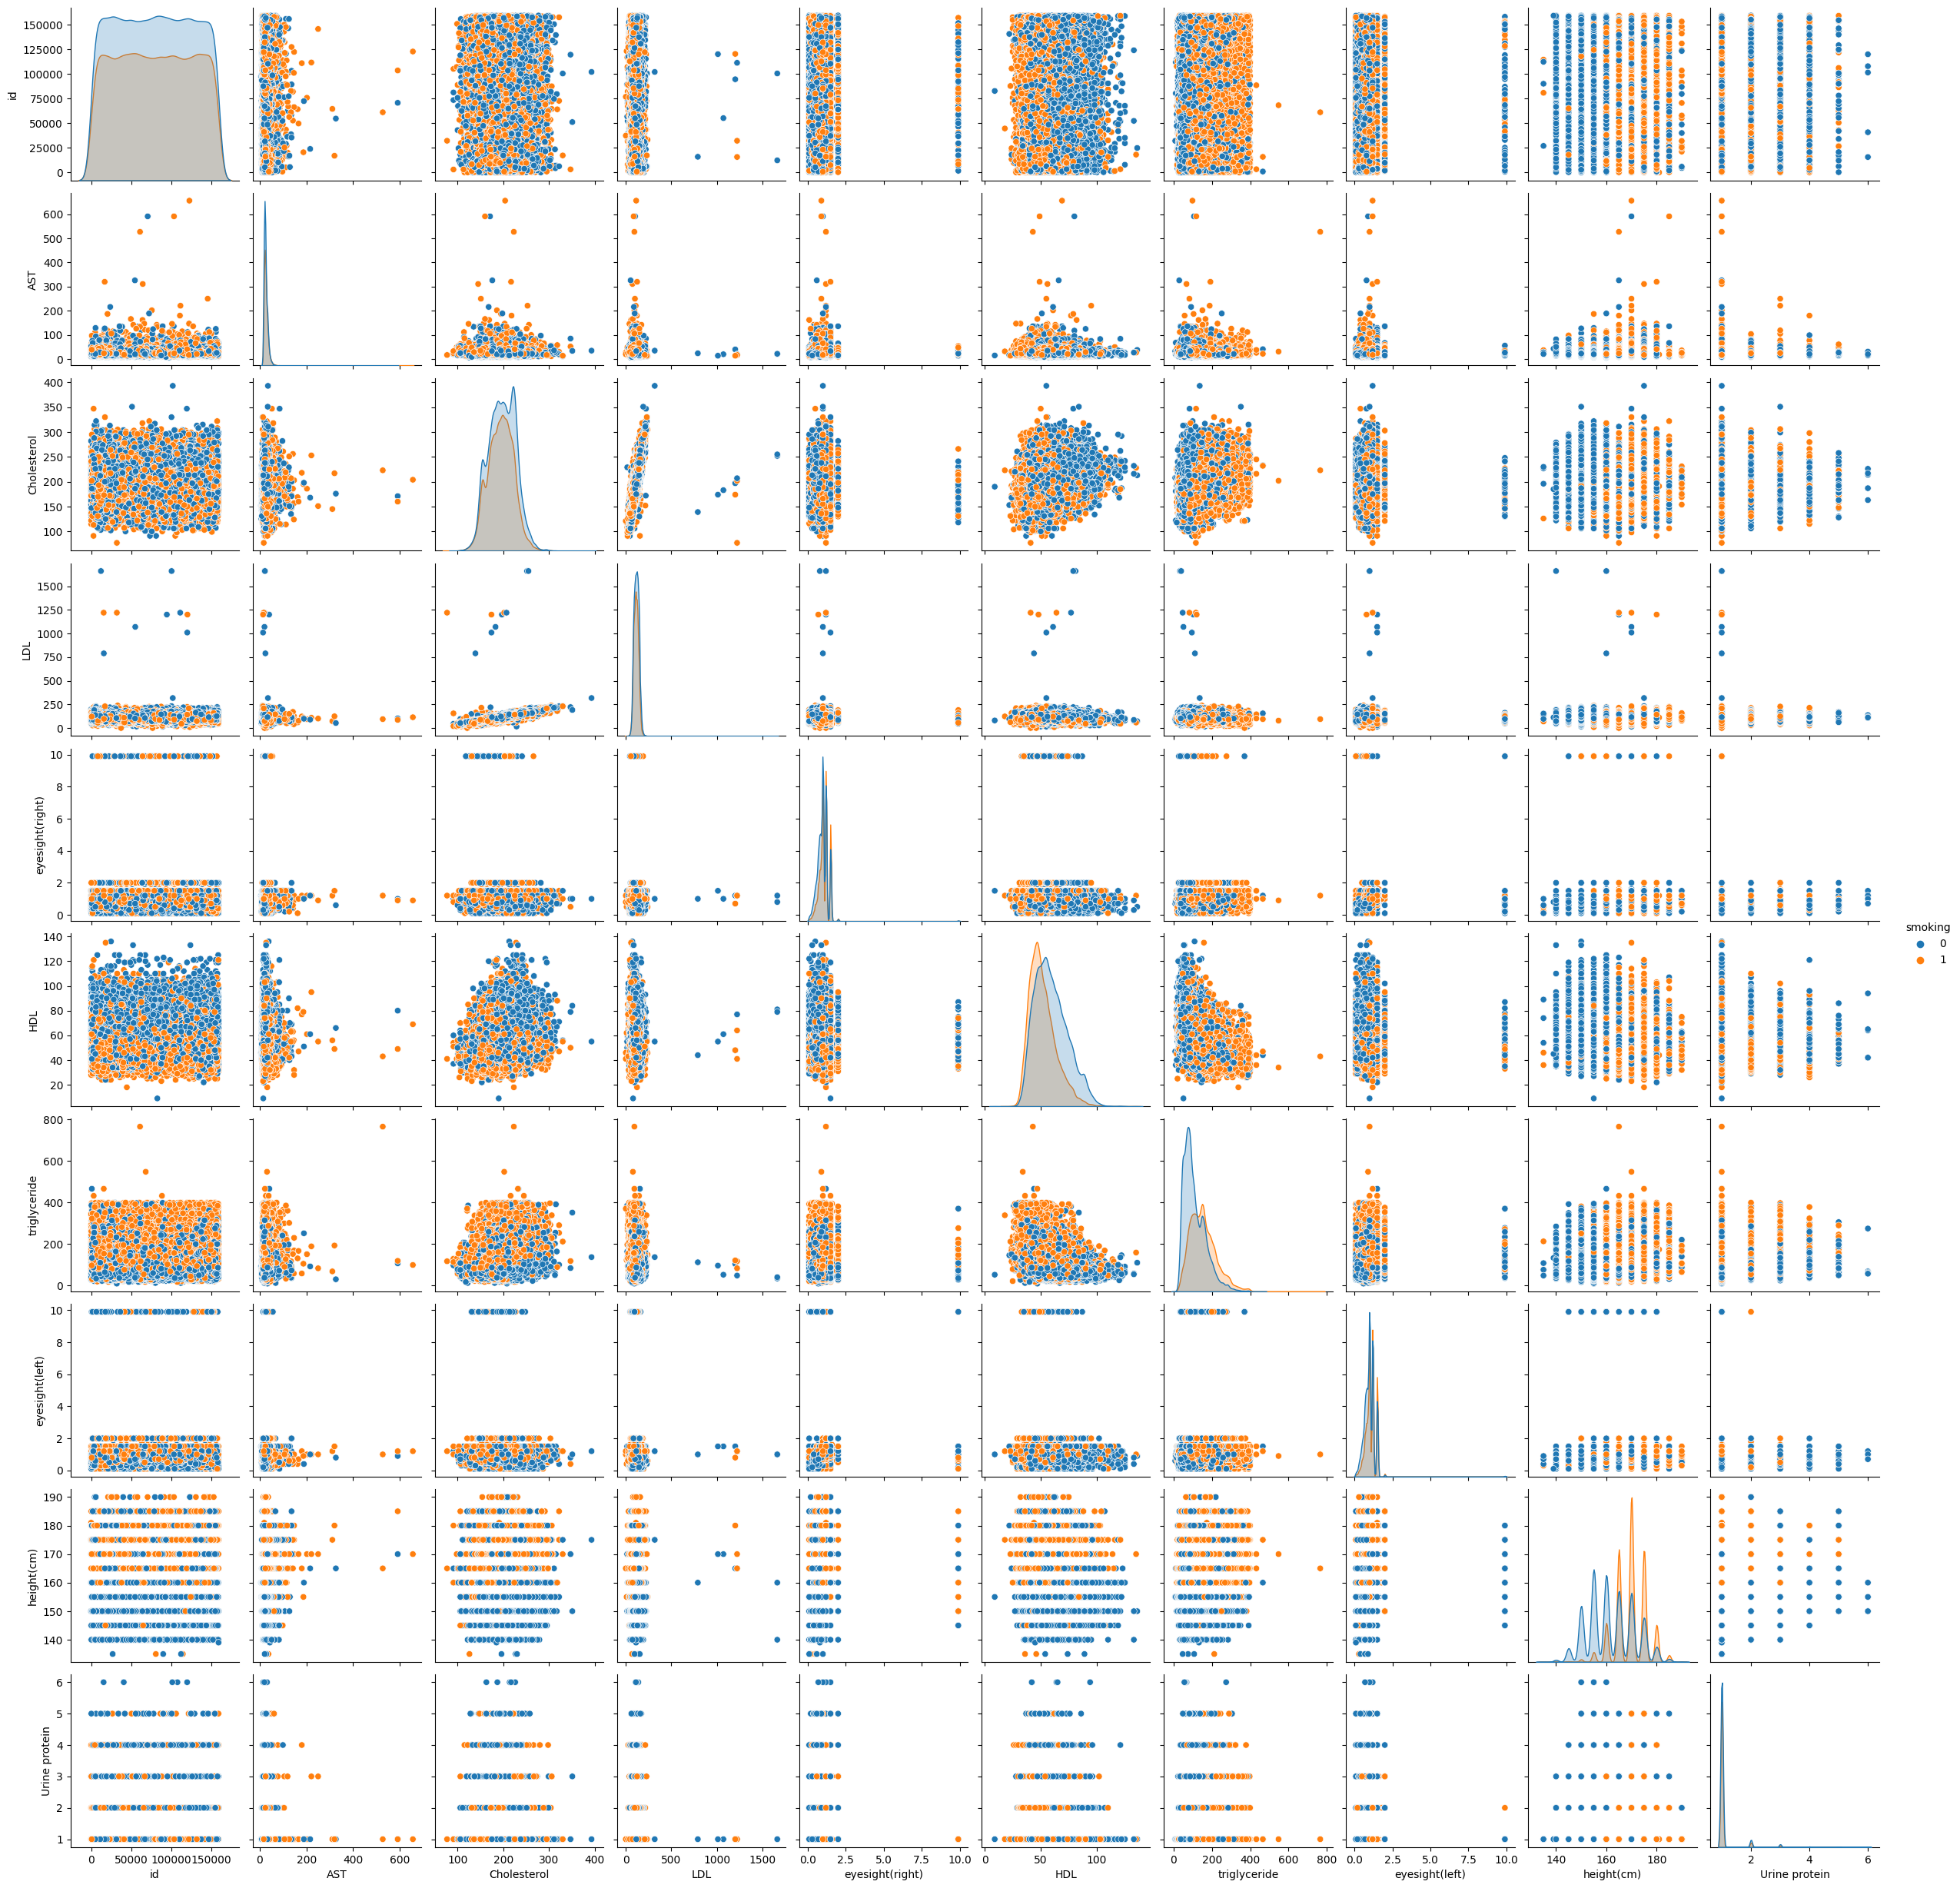

In [16]:
sns.pairplot(data=train,hue='smoking')
plt.show()